In [1]:
import pandas as pd
df=pd.read_csv('/Users/sophiehu/Downloads/covid/merged.csv')
df

,gram,counts,title
0,covid 19 cases,7888,2020-07-21_top1000bigrams
1,covid 19 pandemic,7312,2020-07-21_top1000bigrams
2,covid 19 vaccine,5349,2020-07-21_top1000bigrams
3,positive covid 19,3544,2020-07-21_top1000bigrams
4,worse gets better,2854,2020-07-21_top1000bigrams
...,...,...,...
624209,ministro,1326,2020-05-20_top1000terms
624210,hari,1321,2020-05-20_top1000terms
624211,sem,1320,2020-05-20_top1000terms
624212,worth,1319,2020-05-20_top1000terms


In [2]:
# issue with previous notebooks - too many rows to process - truncate by only taking one word grams

smalldf = df[df['title'].str.contains('terms')]
smalldf

,gram,counts,title
1000,covid,191202,2020-09-17_top1000terms
1001,19,173281,2020-09-17_top1000terms
1002,coronavirus,150734,2020-09-17_top1000terms
1003,covid19,128634,2020-09-17_top1000terms
1004,trump,44674,2020-09-17_top1000terms
...,...,...,...
624209,ministro,1326,2020-05-20_top1000terms
624210,hari,1321,2020-05-20_top1000terms
624211,sem,1320,2020-05-20_top1000terms
624212,worth,1319,2020-05-20_top1000terms


In [3]:
# dropping nan values

sentiments = smalldf.copy()
sentiments.dropna(subset=['gram'], inplace=True)
sentiments

,gram,counts,title
1000,covid,191202,2020-09-17_top1000terms
1001,19,173281,2020-09-17_top1000terms
1002,coronavirus,150734,2020-09-17_top1000terms
1003,covid19,128634,2020-09-17_top1000terms
1004,trump,44674,2020-09-17_top1000terms
...,...,...,...
624209,ministro,1326,2020-05-20_top1000terms
624210,hari,1321,2020-05-20_top1000terms
624211,sem,1320,2020-05-20_top1000terms
624212,worth,1319,2020-05-20_top1000terms


In [4]:
# splitting the title into the date and category

sentiments[['date', 'category']] = sentiments['title'].str.split('_', n=1, expand=True)

sentiments['date'] = pd.to_datetime(sentiments['date']).dt.date.astype(str)

sentiments

,gram,counts,title,date,category
1000,covid,191202,2020-09-17_top1000terms,2020-09-17,top1000terms
1001,19,173281,2020-09-17_top1000terms,2020-09-17,top1000terms
1002,coronavirus,150734,2020-09-17_top1000terms,2020-09-17,top1000terms
1003,covid19,128634,2020-09-17_top1000terms,2020-09-17,top1000terms
1004,trump,44674,2020-09-17_top1000terms,2020-09-17,top1000terms
...,...,...,...,...,...
624209,ministro,1326,2020-05-20_top1000terms,2020-05-20,top1000terms
624210,hari,1321,2020-05-20_top1000terms,2020-05-20,top1000terms
624211,sem,1320,2020-05-20_top1000terms,2020-05-20,top1000terms
624212,worth,1319,2020-05-20_top1000terms,2020-05-20,top1000terms


In [5]:
# dropping excess columns for easier processing

sentiments = sentiments.drop(columns=['title', 'category'])

In [6]:
# further truncating the dataset by only taking the top 100 terms of each day

sentiments["counts"] = pd.to_numeric(sentiments["counts"])
newdf = sentiments.groupby('date').apply(lambda x: x.nlargest(100, 'counts')).reset_index(drop=True)
newdf

,gram,counts,date
0,coronavirus,223843,2020-03-22
1,covid,67037,2020-03-22
2,19,64625,2020-03-22
3,covid19,56389,2020-03-22
4,people,28026,2020-03-22
...,...,...,...
20495,well,5898,2020-10-12
20496,du,5875,2020-10-12
20497,year,5838,2020-10-12
20498,oms,5803,2020-10-12


In [7]:
sample = smalldf.sample(n=10)

In [8]:
from textblob import TextBlob
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

In [10]:
# textblob analysis

newdf['textblob_sentiment'] = newdf['gram'].apply(textblob_sentiment)
newdf

,gram,counts,date,textblob_sentiment
0,coronavirus,223843,2020-03-22,0.0
1,covid,67037,2020-03-22,0.0
2,19,64625,2020-03-22,0.0
3,covid19,56389,2020-03-22,0.0
4,people,28026,2020-03-22,0.0
...,...,...,...,...
20495,well,5898,2020-10-12,0.0
20496,du,5875,2020-10-12,0.0
20497,year,5838,2020-10-12,0.0
20498,oms,5803,2020-10-12,0.0


In [14]:
# checking to make sure they're not all 0's
newdf[newdf['textblob_sentiment']!=0.0]

,gram,counts,date,textblob_sentiment
12,new,13307,2020-03-22,0.136364
29,positive,9616,2020-03-22,0.227273
40,good,7783,2020-03-22,0.700000
50,first,7100,2020-03-22,0.250000
68,social,6020,2020-03-22,0.033333
...,...,...,...,...
20437,due,9533,2020-10-12,-0.125000
20446,many,8204,2020-10-12,0.500000
20463,first,7193,2020-10-12,0.250000
20484,good,6164,2020-10-12,0.700000


In [15]:
# vader analysis

import pandas as pd
from tqdm import tqdm
import numpy as np

chunks = np.array_split(newdf, 100)

# Iterate over the chunks using tqdm progress bar
for chunk in tqdm(chunks):
    # Apply your code to the current chunk
    chunk['vader_sentiment'] = chunk['gram'].apply(vader_sentiment)

100%|██████████| 100/100 [13:58<00:00,  8.39s/it]


In [16]:
chunkdf = pd.concat(chunks, ignore_index=True)
chunkdf

,gram,counts,date,textblob_sentiment,vader_sentiment
0,coronavirus,223843,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,covid,67037,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,19,64625,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,covid19,56389,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,people,28026,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...
20495,well,5898,2020-10-12,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
20496,du,5875,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
20497,year,5838,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
20498,oms,5803,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [17]:
newdf['vader_sentiment'] = chunkdf['vader_sentiment']
newdf

,gram,counts,date,textblob_sentiment,vader_sentiment
0,coronavirus,223843,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,covid,67037,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,19,64625,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,covid19,56389,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,people,28026,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...
20495,well,5898,2020-10-12,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
20496,du,5875,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
20497,year,5838,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
20498,oms,5803,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
for i in tqdm(newdf):
    sentiments_df = pd.DataFrame(newdf['vader_sentiment'].tolist(), index=newdf.index)
    sentiments_df.columns = ['sentiment_' + col for col in sentiments_df.columns]
sentiments = pd.concat([newdf, sentiments_df], axis=1)
sentiments

  0%|          | 5/20500 [00:01<1:10:10,  4.87it/s]


,gram,counts,date,textblob_sentiment,vader_sentiment,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,coronavirus,223843,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
1,covid,67037,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
2,19,64625,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
3,covid19,56389,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
4,people,28026,2020-03-22,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...
20495,well,5898,2020-10-12,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.0,0.0,1.0,0.2732
20496,du,5875,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
20497,year,5838,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000
20498,oms,5803,2020-10-12,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000


In [21]:
grouped_df = sentiments.groupby('date')['textblob_sentiment'].mean()

tb_df = pd.DataFrame({'date': grouped_df.index, 'textblob_sentiment': grouped_df.values})

tb_df

,date,textblob_sentiment
0,2020-03-22,0.023440
1,2020-03-23,0.023440
2,2020-03-24,0.031440
3,2020-03-25,0.031440
4,2020-03-26,0.024077
...,...,...
200,2020-10-08,0.019744
201,2020-10-09,0.019744
202,2020-10-10,0.018744
203,2020-10-11,0.027744


In [22]:
grouped_df = sentiments.groupby('date')['sentiment_compound'].mean()

v_df = pd.DataFrame({'date': grouped_df.index, 'vader_sentiment': grouped_df.values})

v_df

,date,vader_sentiment
0,2020-03-22,0.016248
1,2020-03-23,0.012905
2,2020-03-24,0.009548
3,2020-03-25,0.008776
4,2020-03-26,0.009010
...,...,...
200,2020-10-08,0.008489
201,2020-10-09,0.017246
202,2020-10-10,0.014514
203,2020-10-11,0.015596


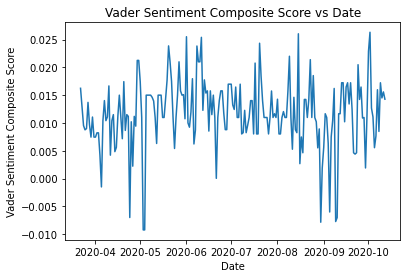

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

v_df['date'] = pd.to_datetime(v_df['date'])
dates = v_df['date']
scores = v_df['vader_sentiment']

fig, ax = plt.subplots()
ax.plot(dates, scores)

# Set the x-axis tick locator to show only the beginning of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set the date format of the x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the title and axis labels
ax.set_title('Vader Sentiment Composite Score vs Date')
ax.set_xlabel('Date')
ax.set_ylabel('Vader Sentiment Composite Score')

plt.show()

In [82]:
max_row = abs(v_df['vader_sentiment']).idxmax()
date_with_highest_score1 = v_df.loc[max_row, 'date']
highest_score1 = v_df.loc[max_row, 'vader_sentiment']
print(date_with_highest_score1, highest_score1)

2020-10-02 00:00:00 0.026328999999999998


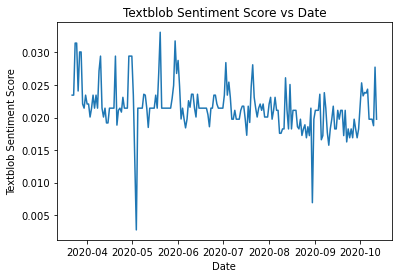

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

tb_df['date'] = pd.to_datetime(tb_df['date'])
dates = tb_df['date']
scores = tb_df['textblob_sentiment']

fig, ax = plt.subplots()
ax.plot(dates, scores)

# Set the x-axis tick locator to show only the beginning of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set the date format of the x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the title and axis labels
ax.set_title('Textblob Sentiment Score vs Date')
ax.set_xlabel('Date')
ax.set_ylabel('Textblob Sentiment Score')

plt.show()

In [81]:
max_row = abs(tb_df['textblob_sentiment']).idxmax()
date_with_highest_score2 = tb_df.loc[max_row, 'date']
highest_score2 = tb_df.loc[max_row, 'textblob_sentiment']
print(date_with_highest_score2, highest_score2)

2020-05-20 00:00:00 0.03310714285714286


In [41]:
neg = sum(sentiments['sentiment_neg'])
pos = sum(sentiments['sentiment_pos'])
neu = sum(sentiments['sentiment_neu'])
print(neg,pos,neu)

706.0 1683.0 18111.0


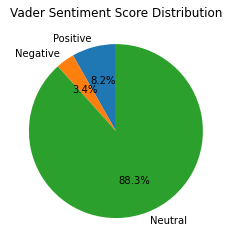

In [62]:
# Create the labels and sizes for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos, neg, neu]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Vader Sentiment Score Distribution')

# Show the plot
plt.show()

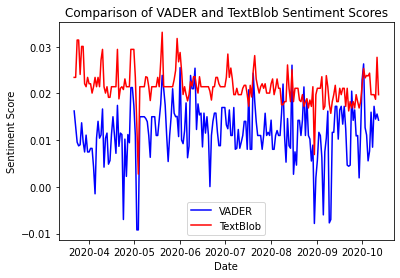

In [86]:
import matplotlib.pyplot as plt

# create figure and axis objects
fig, ax = plt.subplots()

# plot the two lines with different colors and labels
ax.plot(v_df['date'], v_df['vader_sentiment'], color='blue', label='VADER')
ax.plot(tb_df['date'], tb_df['textblob_sentiment'], color='red', label='TextBlob')

# add legend
ax.legend()

# set x and y labels
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')

# set plot title
ax.set_title('Comparison of VADER and TextBlob Sentiment Scores')

# show plot
plt.show()

In [75]:
neg1 = sum(sentiments['textblob_sentiment']<0)
neu1 = sum(sentiments['textblob_sentiment']==0)
pos1 = sum(sentiments['textblob_sentiment']>0)
print(neg1,neu1,pos1)

218 18755 1527


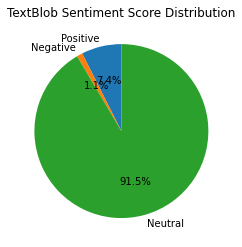

In [76]:
# Create the labels and sizes for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos1, neg1, neu1]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('TextBlob Sentiment Score Distribution')

# Show the plot
plt.show()

In [84]:
df = pd.DataFrame({'model': ['VADER','TextBlob'],
                   'date': [date_with_highest_score1,date_with_highest_score2],
                   'score': [highest_score1,highest_score2]})
df

,model,date,score
0,VADER,2020-10-02,0.026329
1,TextBlob,2020-05-20,0.033107
